In [2]:
%load_ext autoreload
%autoreload 1
%matplotlib inline
import os
import sys
import numpy as np
import pandas as pd

root_dir = os.path.join(os.getcwd(),os.pardir,os.pardir)
src_dir = os.path.join(os.getcwd(), os.pardir,os.pardir, 'src')
if src_dir not in sys.path: sys.path.append(src_dir)

from data.preprocessing import load_file,save_file,filter_by_season,display_df,get_scaled_series
from features import build_features
from visualization import visualize as viz, cluster_analysis as va
import settings

%aimport data.preprocessing
%aimport features.build_features
%aimport visualization.visualize
%aimport visualization.cluster_analysis

row_headers=settings.row_headers

In [189]:
season = "Summer"
version = 2
filename = "nb_p2_clusters_%s"%(season)
# filename = "p2_clusters_%s"%(season)


#Load files
raw_df = load_file("p2_raw").set_index(row_headers)
series_df =load_file("p2_series",type_="P",version = 1).set_index(row_headers)
clean_df = load_file("p2_clean",type_="P",version = 1).set_index(row_headers)

#Filter and normalize
sclean_df = filter_by_season(clean_df,season)
zclean_df,_ =  get_scaled_series(sclean_df)

#clustering result
cluster_df = load_file(filename,index=row_headers,type_="M",version=version)
cluster_centroid = cluster_df[["Cluster","Centroid"]].drop_duplicates().set_index(["Cluster"]).to_dict()["Centroid"]

plot_df = clean_df.join(cluster_df,how="inner")

#cleaned features
features_df = load_file('clf_features',type_="P",index = "Product")



assert features_df is not  None
features_df.Ldate = features_df.Ldate.apply(lambda x:str(x))
numeric = (list(features_df.columns.to_series().groupby(features_df.dtypes).groups[np.dtype('float64')]))
features_list = list(features_df.columns) + ["Cluster"]
df = features_df.join(cluster_df,how="inner")[features_list]



In [ ]:
viz.cluster_plot(plot_df,centroid_only = False)

In [ ]:
va.centroid_grid_plot(raw_df,clean_df,cluster_df)

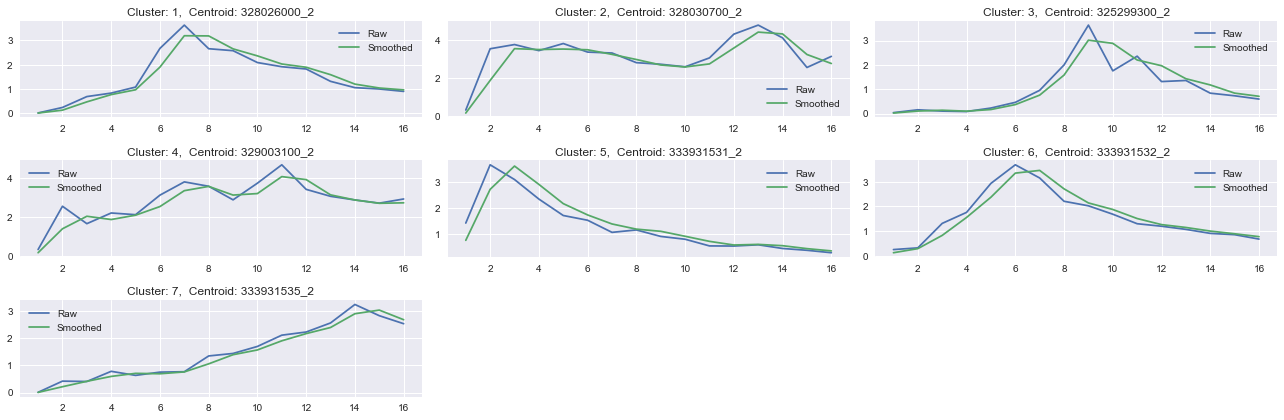

In [190]:
va.centroid_grid_plot(raw_df,clean_df,cluster_df)

In [185]:
centroids = list(set(cluster_df.Centroid))

counts = cluster_df.groupby(["Centroid"]).count()[["Cluster"]].values


raw_profiles = series_df.loc[centroids].apply(lambda x:x/x.std(),axis=1).sort_index()
raw_profiles["Count"] = counts

smoothed_profiles = clean_df.loc[centroids].apply(lambda x:x/x.std(),axis=1).sort_index()
smoothed_profiles["Count"] = counts

# save_file(raw_profiles,"profiles_%s_raw"%season,type_="RP",index=True)
# save_file(smoothed_profiles,"profiles_%s_smoothed"%season,type_="RP",index=True)

In [186]:
zclean_df.loc[centroids].sort_index().head()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
Product,,,,,,,,,,,,,,,,
31A002600_2,-3.872983,0.258199,0.258199,0.258199,0.258199,0.258199,0.258199,0.258199,0.258199,0.258199,0.258199,0.258199,0.258199,0.258199,0.258199,0.258199
331054200_2,-1.337133,-1.234417,-0.851516,-0.485617,-0.302808,-0.041873,-0.322199,0.191802,1.406969,1.741954,1.689683,1.261817,0.448521,-0.321075,-0.804725,-1.039384
335027224_2,-2.643751,-1.541099,-0.514492,0.645194,1.120475,1.120475,1.557733,0.759261,0.207935,-0.077233,-0.096244,-0.020199,-0.457458,-0.096244,0.302992,-0.267346
335027300_2,-0.253173,0.550144,1.473103,2.173869,1.943129,0.661241,-0.330086,-0.406999,-0.586464,-0.689015,-0.714653,-0.748836,-0.765928,-0.774474,-0.765928,-0.765928
335045300_2,-1.133715,0.020030,0.340515,0.789194,1.494261,1.109679,0.564855,0.981485,1.141728,0.436661,-0.204309,-0.332503,-0.652988,-1.133715,-1.614443,-1.806734


## 1. Import data

In [24]:
! python c:/Users/rahmim00/Documents/Notebooks/Clustering/pc_clustering/src/data/import_data.py

2018-07-12 16:23:00,904 - __main__ - INFO - Load raw data file...
2018-07-12 16:23:20,061 - __main__ - INFO - Droping uneccessary columns...
2018-07-12 16:23:20,921 - __main__ - INFO - Setting headers info...
2018-07-12 16:23:23,394 - __main__ - INFO - Loading products descriptions...
2018-07-12 16:23:38,784 - __main__ - INFO - Loading clients descriptions...
2018-07-12 16:23:39,148 - __main__ - INFO - Saving store counts file...
2018-07-12 16:23:41,014 - __main__ - INFO - Saving clients count by product...


## 2. Make dataset

In [21]:
! python c:/Users/rahmim00/Documents/Notebooks/Clustering/pc_clustering/src/data/make_dataset.py 1

2018-07-12 16:18:15,546 - __main__ - INFO - *** Making final data set from raw data ***
2018-07-12 16:18:15,546 - __main__ - INFO - loading raw data sales file...
2018-07-12 16:18:15,742 - __main__ - INFO - remove null sales...
2018-07-12 16:18:15,773 - __main__ - INFO - trim empty values...
2018-07-12 16:18:16,319 - __main__ - INFO - shit series to origin with 1 offset and range of 16 ...
2018-07-12 16:18:17,100 - __main__ - INFO - ==> Saving raw state data to p2_raw
2018-07-12 16:18:17,171 - __main__ - INFO - remove rare sales...
2018-07-12 16:18:17,202 - __main__ - INFO - Smoothing the series window = 2
2018-07-12 16:18:17,249 - __main__ - INFO - ==> Saving processed data to p2_clean
2018-07-12 16:18:17,311 - __main__ - INFO - ==> Saving raw values data to p2_series


## 3. Train clustering model

In [41]:
! python c:/Users/rahmim00/Documents/Notebooks/Clustering/pc_clustering/src/models/train_model_clustering.py Autumn --version=99 --k=12

2018-07-12 16:34:44,808 - __main__ - INFO - Running clustering model for <<Autumn>> version = 99...
2018-07-12 16:34:44,914 - __main__ - INFO - Init clustering model
2018-07-12 16:34:44,914 - __main__ - INFO - Training clustering model with 12 clusters
2018-07-12 16:34:45,384 - __main__ - INFO - Model with 12 clusters successfully saved


## 4. Build features

In [39]:
! python c:/Users/rahmim00/Documents/Notebooks/Clustering/pc_clustering/src/features/build_features.py

2018-07-12 16:33:01,217 - __main__ - INFO - Load raw sales file...
2018-07-12 16:33:01,234 - __main__ - INFO - Load product description file...
2018-07-12 16:33:01,649 - __main__ - INFO - Load clients count  file...
2018-07-12 16:33:01,664 - __main__ - INFO - Feature engineering...
2018-07-12 16:33:01,913 - __main__ - INFO - ==> Saving features file to clf_features ...
2018-07-12 16:33:01,961 - __main__ - INFO - Creating encoders...
2018-07-12 16:33:02,099 - __main__ - INFO - Data set succefully made !


## 5. Train classifier

## 6. Train Predictor